<a href="https://colab.research.google.com/github/Chandani-Sharma/Machine-Learning/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction 



##### **Project Type**    - Classification
##### **Contribution**    - Individual (Chandani Kumari)


# **Project Summary -**

The aim of this project is to predict credit card default payments in Taiwan using data science techniques. The focus is on risk management, where the estimated probability of default is more valuable than a simple binary classification. The project involves the following steps:

1. Data Collection

2. Data Preprocessing: Perform necessary data preprocessing steps, such as handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.

3. Exploratory Data Analysis (EDA): Conduct an in-depth analysis of the data, including understanding the target feature, assessing class imbalance, and visualizing the relationships between variables.

4. Feature Engineering: Perform feature engineering techniques such as encoding, creating new features, and handling multicollinearity to improve the predictive power of the models.

5. Model Selection and Training: Choose suitable classification algorithms, such as logistic regression, decision trees, or gradient boosting methods, and train them on the training data.Evaluation: Evaluate the performance of the trained models using appropriate evaluation metrics, considering class imbalance. Use techniques like K-S chart to assess which customers are more likely to default on their credit card payments.

6. Feature Importance and Conclusion

**The content of dataset**

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)


# **GitHub Link -**

https://github.com/Chandani-Sharma/Machine-Learning/blob/main/Credit_Card_Default_Prediction.ipynb

# **Problem Statement**


- Variation in Default Payment Probability: Explore how default payment probability differs across demographic variables like gender, education, marital status, and age categories. Identify patterns to understand the impact of these variables on default likelihood.

- Strongest Predictors of Default Payment: Determine the variables that have the highest predictive power for default payment. Assess the importance of features such as payment history, bill statements, and previous payments in accurately estimating default probability.

- Handling Class Imbalance: Address the issue of class imbalance, where default cases are significantly fewer than non-default cases. Investigate techniques to mitigate the impact of class imbalance on model performance and ensure reliable predictions.

- Model Interpretability and Explainability: Develop an interpretable model that provides insights into the factors influencing default predictions. Explain the contribution of different variables to the predicted default probabilities, enabling stakeholders to understand the decision-making process.

- Business Impact and Risk Management: Evaluate the practical implications of the default prediction model on risk management strategies. Analyze how accurate estimation of default probabilities can improve risk assessment, credit decisions, and overall business outcomes. Provide actionable recommendations to enhance risk management practices and mitigate credit risks.

# **DATA EXPLORATION**

## ***1. Load the Dataset***

### Import Libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [142]:
# Load Dataset
df = pd.read_excel('/content/default of credit card clients.xls')

## ***2. Understanding Your Variables***

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
rows, columns = df.shape
print(f'Number of rows are {rows} and columns are {columns}')


Number of rows are 30001 and columns are 25


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

The information shows that no column is empty that means we don't have to deal with the null values now.

## 3. ***Data Wrangling***

In [143]:
# Remove the first row and reset the index
df = df.iloc[1:].reset_index(drop=True)

# # Assign new column names
new_column_names = [
     'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
     'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     'default.payment.next.month'
 ]
df.columns = new_column_names

In [98]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [144]:
df = df.copy()

### Data Wrangling Code

In [145]:
# Define the column and data type mappings
column_types = {
    'SEX': int,
    'EDUCATION': int,
    'MARRIAGE': int,
    'AGE': int,
    'PAY_0': int,
    'PAY_2': int,
    'PAY_3': int,
    'PAY_4': int,
    'PAY_5': int,
    'PAY_6': int,
    'ID': int,
    'default.payment.next.month' : int,
    'BILL_AMT1': float,
    'BILL_AMT2': float,
    'BILL_AMT3': float,
    'BILL_AMT4': float,
    'BILL_AMT5': float,
    'BILL_AMT6': float,
    'PAY_AMT1': float,
    'PAY_AMT2': float,
    'PAY_AMT3': float,
    'PAY_AMT4': float,
    'PAY_AMT5': float,
    'PAY_AMT6': float,
    'LIMIT_BAL': float

}

# Convert columns to specified data types
df = df.astype(column_types)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Conclusions:

- The average mean limiting balance of the custoners is 167,100.
- Average age is 35.5 years, with a standard deviation of 9.2.
- Education level is mostly graduate school and university.
- Majority of the population of the datatset or more than 75% are not paying default payment next month.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Histogram

Text(0.5, 1.0, 'Distribution of LIMIT BALANCE')

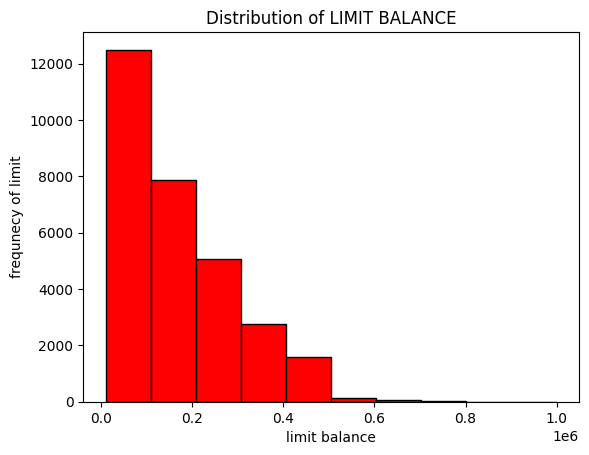

In [9]:
#creeating histogram to know the distribution of LIMIT_BAL
plt.hist(df['LIMIT_BAL'], edgecolor = 'black', color = 'red')
plt.xlabel('limit balance')
plt.ylabel('frequnecy of limit')
plt.title('Distribution of LIMIT BALANCE')

It shows that the largest group of amount of credit limit is 50,000.

###Kernel Density Plot

Text(0.5, 1.0, 'Age Distribution Analysis')

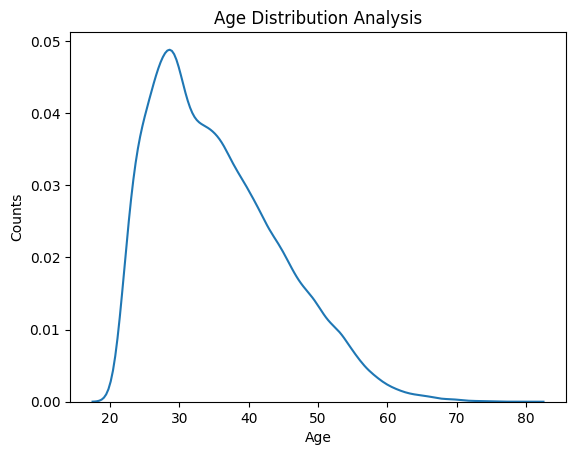

In [12]:
# creating kernel density plot for age
sns.kdeplot(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution Analysis')

OBSERVATION

- Peak Age: The distribution exhibits a notable concentration or highest density around the age of 30, as indicated by the KDE plot. This suggests a substantial proportion of individuals within the dataset fall within this particular age range.

- Decrease in Data Points: Beyond the age of 60, the dataset appears to contain relatively fewer data points. This suggests a decline in the number of individuals as age progresses beyond this threshold, possibly indicating a smaller representation of older age groups within the dataset.

###Bargraph

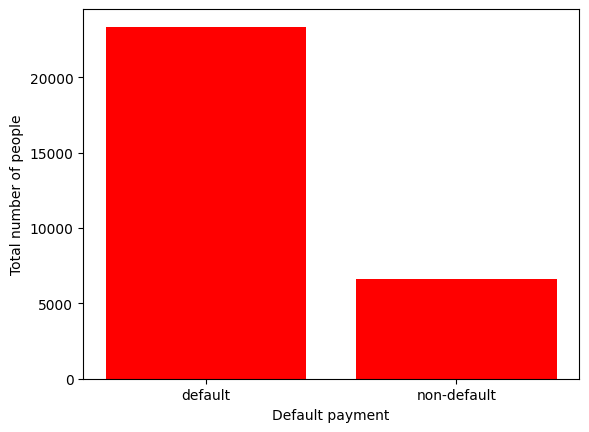

In [39]:
## Count the number of instances with default payment and non-default payment
sum_of_default = df[df['default.payment.next.month'] == 0].shape[0]
sum_of_non_default = df[df['default.payment.next.month'] == 1].shape[0]

# Define the labels for the bar graph categories
labels = ['default', 'non-default']

## Create a list with the total count of people in each category
total = [sum_of_default, sum_of_non_default]

# Plot the bar graph
plt.bar(labels, total, color = 'red')
plt.xlabel('Default payment')
plt.ylabel('Total number of people')
plt.show()


OBSERVATION


- The bar graph clearly illustrates a substantial difference between the number of individuals projected to default on their payment and those expected to make timely payments. 
- The count of defaulters is significantly lower compared to non-defaulters, indicating a notable imbalance in payment outcomes. 
- This visualization emphasizes the need for further investigation into the factors influencing default rates within the dataset.

###Bargraph

In [28]:
# Calculate and display the number of males and females in the dataset
male = df[df['SEX'] == 1]['ID'].count()
female = df[df['SEX'] == 2]['ID'].count()

#Print the numbers
print(f'Number of male in the dataset are {male} and number of female are {female}')

Number of male in the dataset are 11888 and number of female are 18112


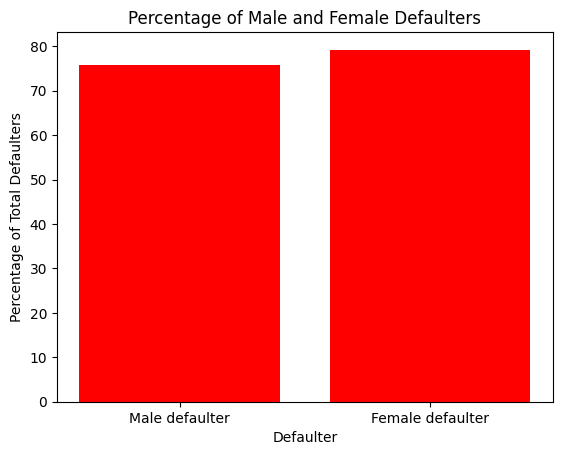

In [37]:
# Calculate the percentage of male and female defaulters and create a bar chart to visualize the results
percentage_of_male_defaulter = df[df['SEX'] == 1].groupby('default.payment.next.month')['ID'].count()[0] / df[df['SEX'] == 1]['ID'].count() * 100
percentage_of_female_defaulter = df[df['SEX'] == 2].groupby('default.payment.next.month')['ID'].count()[0] / df[df['SEX'] == 2]['ID'].count() * 100

# Define labels and total values for the bar chart
labels = ['Male defaulter', 'Female defaulter']
total = percentage_of_male_defaulter, percentage_of_female_defaulter

# Create a bar chart to display the percentages
plt.bar(labels, total, color = 'red')
plt.xlabel('Defaulter')
plt.ylabel('Percentage of Total Defaulters')
plt.title('Percentage of Male and Female Defaulters')
plt.show()


OBSERVATION

- Given the unequal distribution of genders within our dataset, it is advisable to rely on percentages rather than total counts when analyzing defaulters. 
- By considering the percentage of defaulters within each gender category, we gain a more accurate understanding of the relative default rates. 
- Notably, our findings indicate that females exhibit a slightly higher default rate compared to males. 


### Boxplot

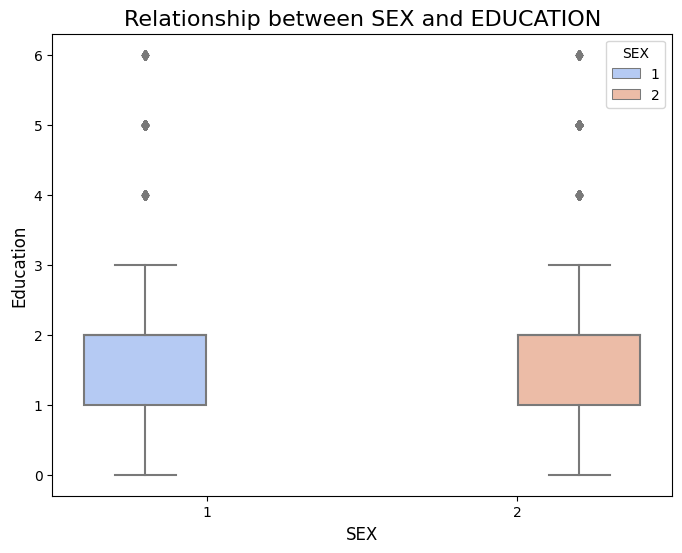

In [43]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the relationship using seaborn
sns.boxplot(data=df, x='SEX', y='EDUCATION', hue='SEX', palette='coolwarm')

# Set the plot title and axis labels
plt.title('Relationship between SEX and EDUCATION', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Education', fontsize=12)

# Display the plot
plt.show()

Obseravtion

The analysis of the data reveals a balanced distribution of education levels among both genders. 
 

###Heatmap

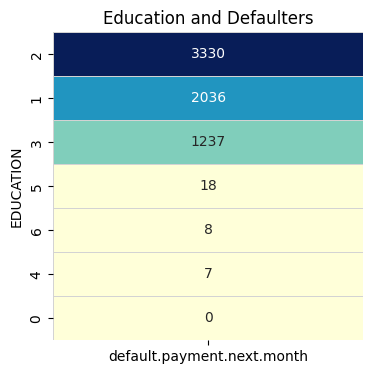

In [46]:
#Is there a connection between education and defaulters?

education = df[['EDUCATION', 'default.payment.next.month']].groupby(['EDUCATION'], axis=0).sum().sort_values('default.payment.next.month', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Education and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

People of graduate school, university, and high school are highly close to making deault payment.

###Heatmap

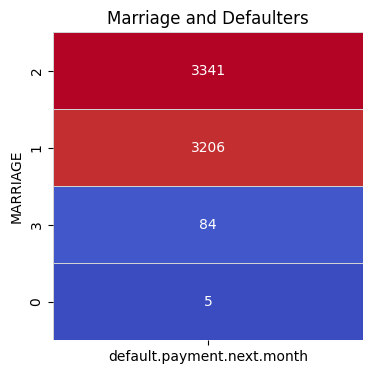

In [47]:
#Is there a connection between marriage and defaulters?

education = df[['MARRIAGE', 'default.payment.next.month']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default.payment.next.month', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Marriage and Defaulters')

sns.heatmap(education, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.show()

The analysis reveals a distinct pattern where individuals categorized as "single" exhibit the highest likelihood of defaulting on their payments, followed by those classified as "married." This observation prompts an inquiry into the potential relationship between marital status, education level, and default rates 

###Countplot

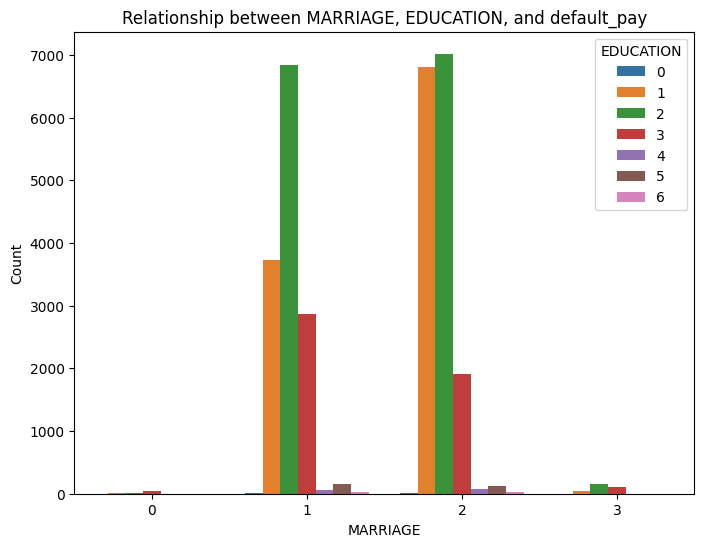

In [50]:
# Plotting the relationship between variables
plt.figure(figsize=(8,6))
sns.countplot(x="MARRIAGE", hue="EDUCATION", data=df)
plt.title("Relationship between MARRIAGE, EDUCATION, and default_pay")
plt.xlabel("MARRIAGE")
plt.ylabel("Count")

# Adjust the legend position
plt.legend(title="EDUCATION", loc="upper right")

plt.show()

OBSERVATION

- The graph suggests a potential association between default rates and marital status among individuals with different educational backgrounds. 
- Specifically, it indicates that single university students have the highest likelihood of default, while both university and high school students are more prone to default when married. 
- This prompts further exploration into the possible connection between marriage, university education, and default behavior to better understand the underlying factors at play.






###Piechart

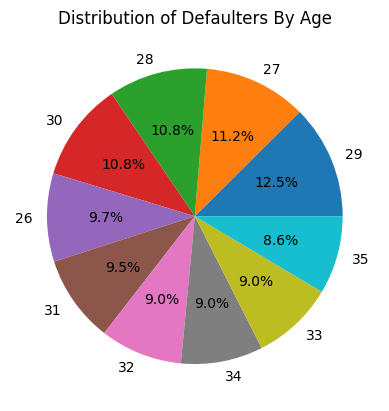

In [57]:
defualters_by_age = df[df['default.payment.next.month'] == 0]['AGE'].value_counts()[:10]

# Extract the counts and age labels
sizes = defualters_by_age.values
labels = defualters_by_age.index

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Defaulters By Age')

# Display the pie chart
plt.show()


OBSERVATION

- The analysis of defaulters by age reveals interesting insights. Among the top 10 defaulters, the majority fall within the age range of 35 years and below. 
- Notably, individuals aged 29 years stand out as having the highest number of defaults, while those aged 35 exhibit the lowest count among the top 10 defaulters. 
- This observation suggests a concentration of default incidents among relatively younger individuals. 

###Correlation

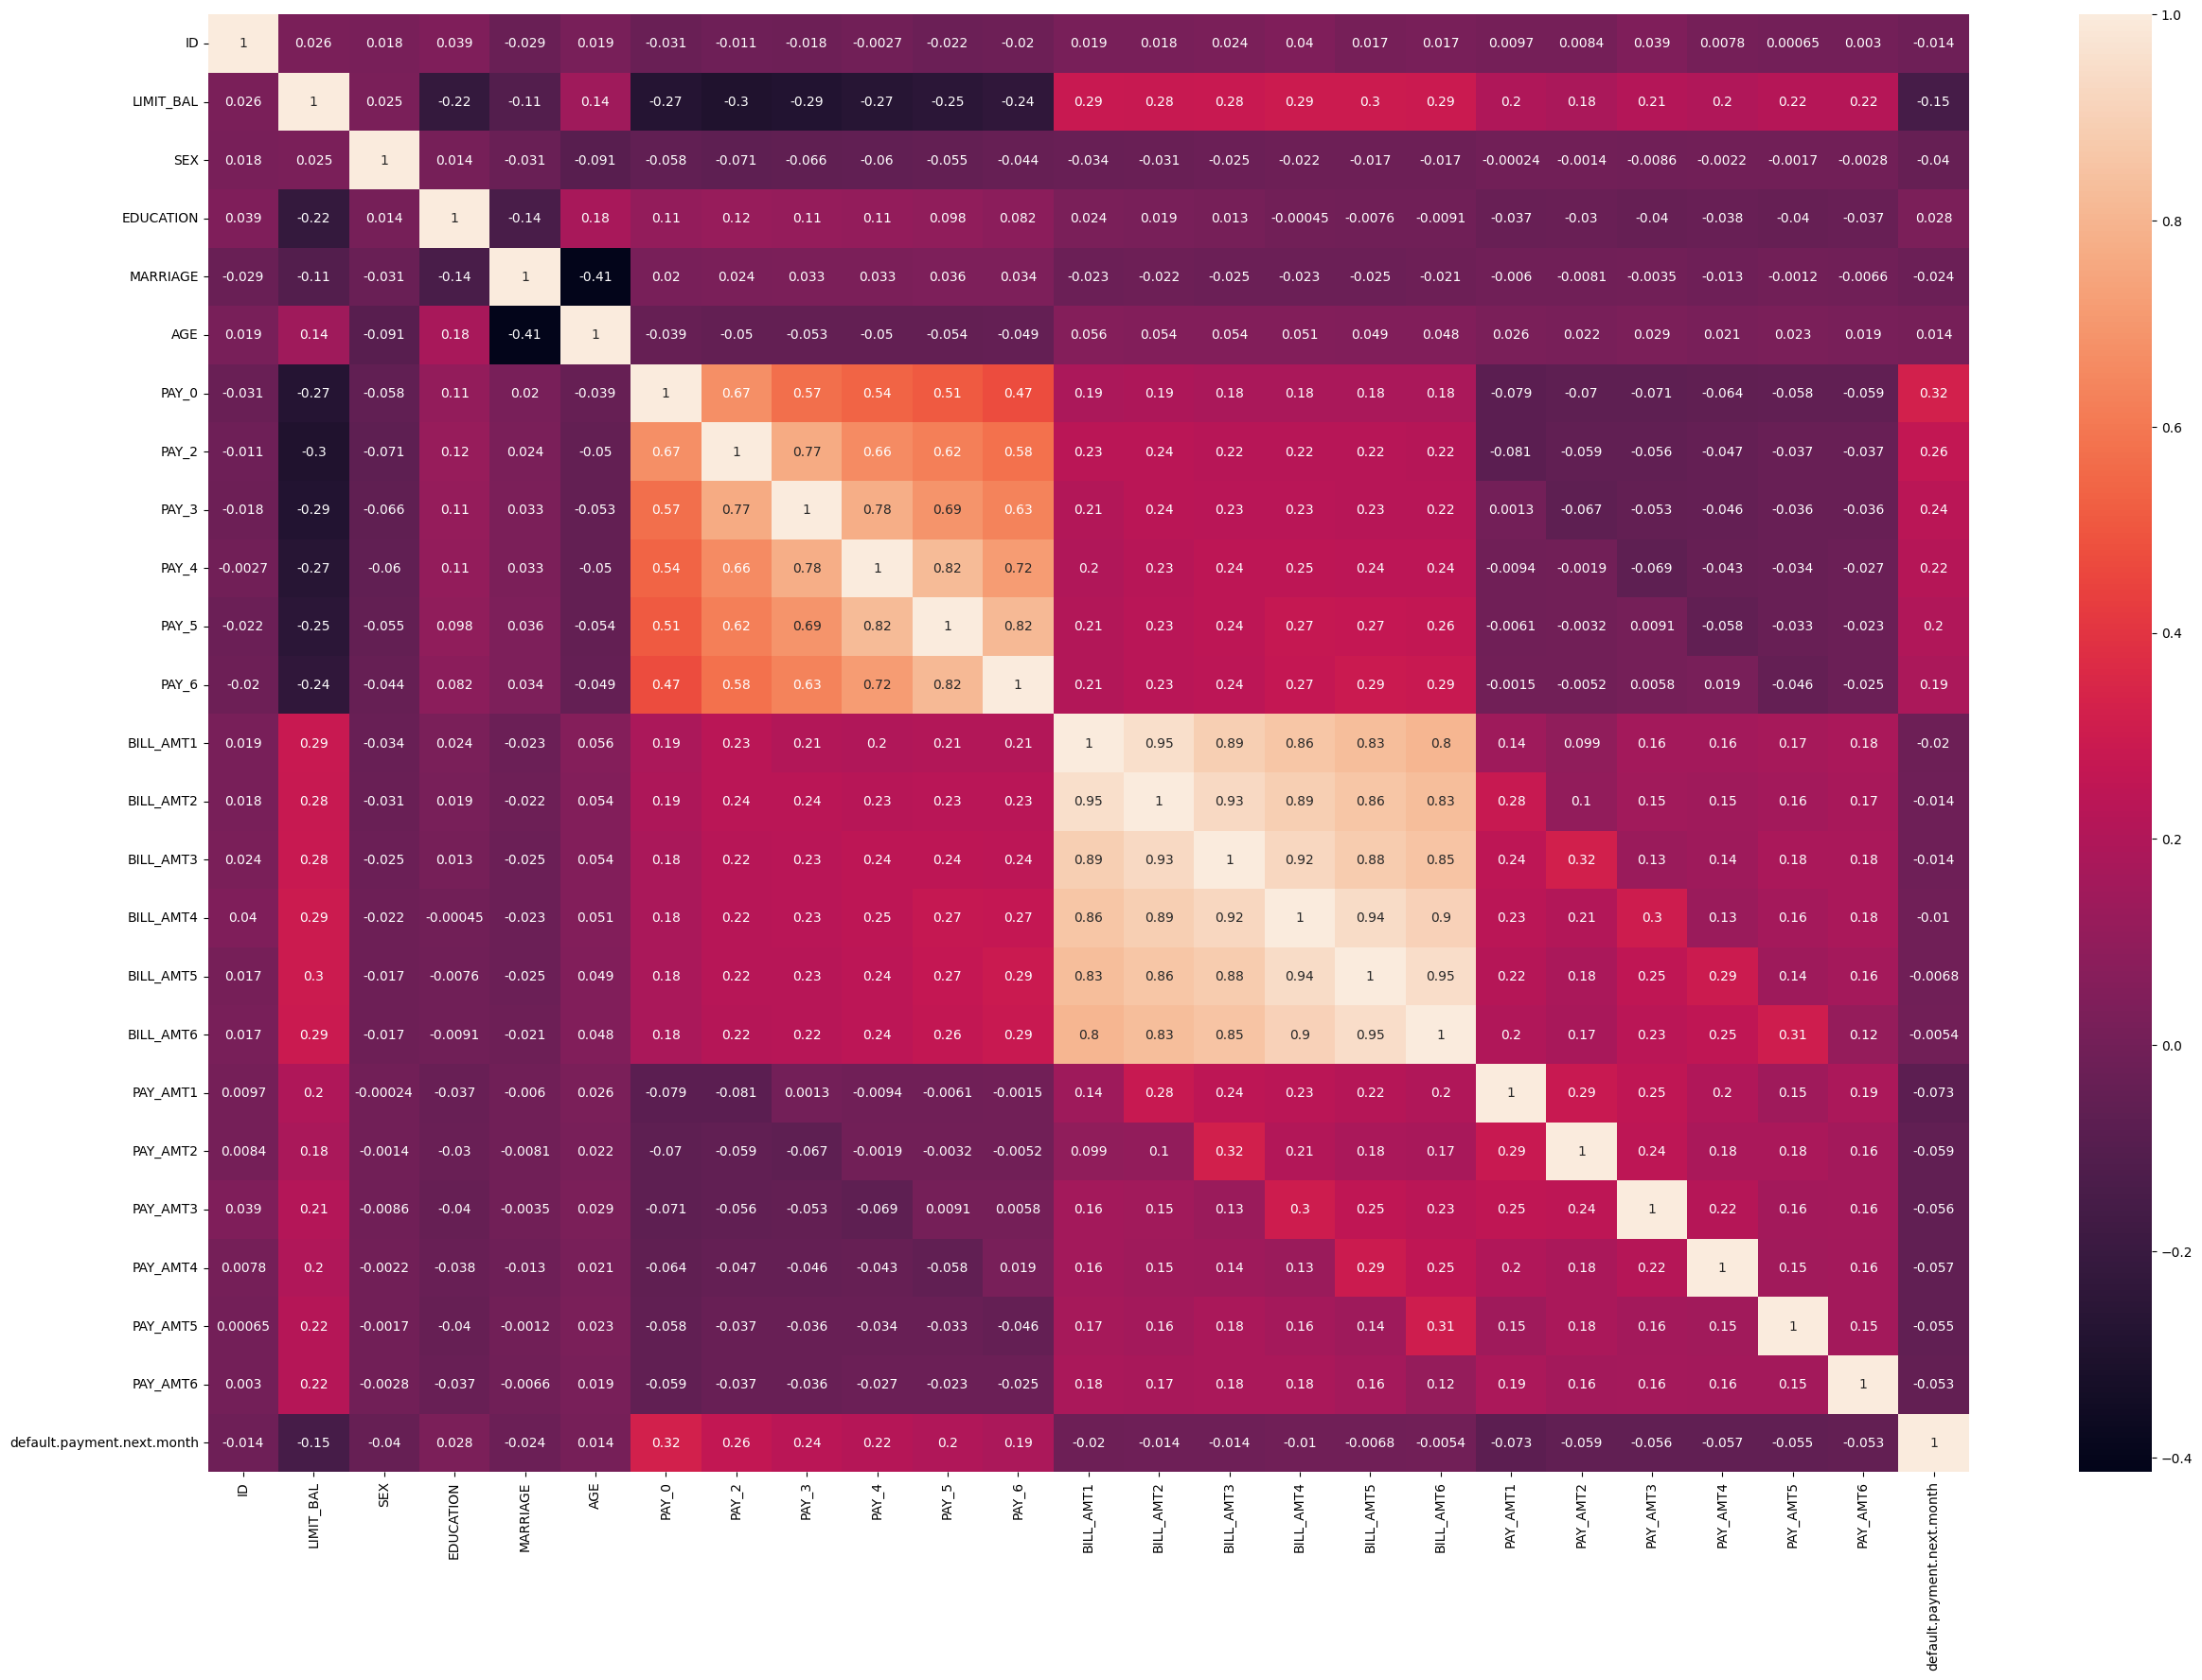

In [74]:
# creating correlation chart/ heatmap for all the variables
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

BILL_AMT_1 - BILL_AMT_6 are highly correlated with each other. We proceed to take a closer look at the values of the correlation coefficients between these variables

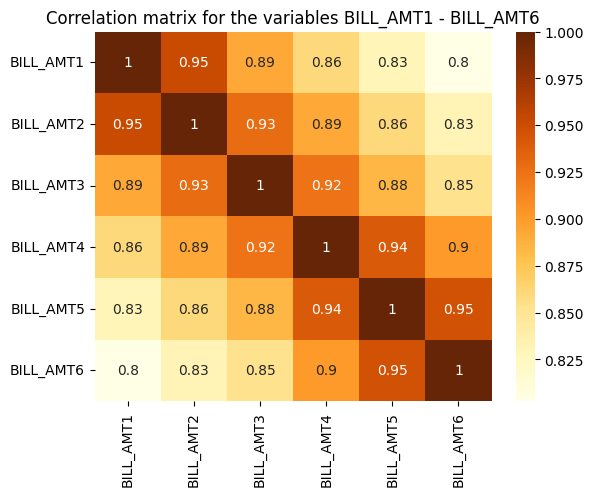

In [132]:
#creating correaltion chart of all the highly correlated variables that is BILL_AMT_1 - BILL_AMT_6 
sns.heatmap(df.loc[:, 'BILL_AMT1':'BILL_AMT6'].corr(), annot=True, cmap='YlOrBr')
plt.title('Correlation matrix for the variables BILL_AMT1 - BILL_AMT6')
plt.show()

Upon conducting a thorough analysis of the correlation matrix, it becomes evident that the variables BILL_AMT1 to BILL_AMT6 exhibit a high positive correlation, with all correlation coefficients exceeding 0.8. This implies that these variables contain similar information, and there is a strong redundancy among them. Consequently, it is advisable to consolidate these variables into a single representative measure. One possible approach is to aggregate them by calculating the mean value. By doing so, we can capture the essence of these variables while reducing the dimensionality of the dataset and eliminating redundant information.

In [146]:
# Removing all the column from BILL_AMT_1 - BILL_AMT_6 by taking the average of all of it by creating new column
df['BILL_AMT_AVG'] = df.loc[:, 'BILL_AMT1':'BILL_AMT6'].mean(axis=1)

#drop the column BILL_AMT_1 - BILL_AMT_6 
df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1, inplace=True)

In [78]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT_AVG
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1,1284.000000
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,16942.166667
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,38555.666667
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,18223.166667


## ***6. Feature Engineering & Data Pre-processing***

In [148]:
# Split the dataframe by dropping the column 'default.payment.next.month' and assign it to variable X
X = df.drop(['default.payment.next.month', 'ID'], axis=1)

# Create a new series 'y' by selecting the column 'default.payment.next.month' from the dataframe df
y = df['default.payment.next.month']

# Display the first few rows of the dataframe X
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_AVG
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1284.000000
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2846.166667
2,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,16942.166667
3,50000.0,2,2,1,37,0,0,0,0,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,38555.666667
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,18223.166667


In [149]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Use the scaler to standardize the values in the dataframe X and assign the transformed data back to X
X = scaler.fit_transform(X)

In [150]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [151]:
# Import the required library
from imblearn.over_sampling import SMOTE
from collections import Counter

# Summarize class distribution before oversampling
print("Before oversampling:", Counter(y_train))

# Create an instance of the SMOTE class
SMOTE = SMOTE()

# Apply SMOTE to oversample the minority class in the training data
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# Summarize class distribution after oversampling
print("After oversampling:", Counter(y_train))


Before oversampling: Counter({0: 18677, 1: 5323})
After oversampling: Counter({0: 18677, 1: 18677})


## ***7. ML Model Implementation***

We will be using following model:
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)


# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.6841666666666667
Decision Tree Accuracy: 0.6976666666666667
Random Forest Accuracy: 0.7945


###Feature Importance

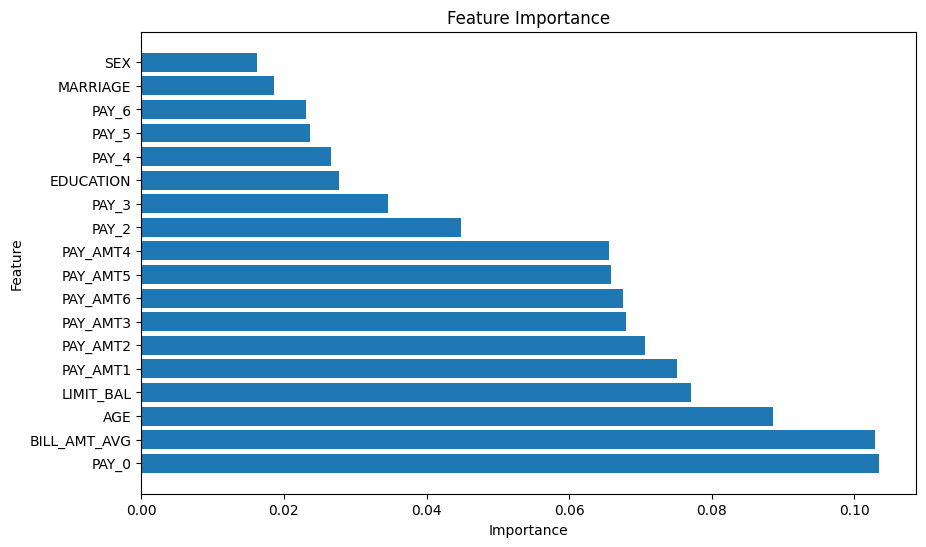

         Feature  Importance
5          PAY_0    0.103499
17  BILL_AMT_AVG    0.102849
4            AGE    0.088608
0      LIMIT_BAL    0.077108
11      PAY_AMT1    0.075068
12      PAY_AMT2    0.070700
13      PAY_AMT3    0.067959
16      PAY_AMT6    0.067615
15      PAY_AMT5    0.065882
14      PAY_AMT4    0.065622
6          PAY_2    0.044787
7          PAY_3    0.034539
2      EDUCATION    0.027779
8          PAY_4    0.026589
9          PAY_5    0.023651
10         PAY_6    0.023038
3       MARRIAGE    0.018542
1            SEX    0.016166


In [158]:
X = df.drop(['default.payment.next.month','ID'], axis=1)
y = df['default.payment.next.month']

# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)


Now that we have identified important features for our prediction task, we can proceed to drop some of the least important features and assess if this improves our accuracy. By removing less relevant features, we aim to streamline the model and potentially enhance its predictive performance.

In [159]:
def_new = df[["PAY_0", "AGE", "BILL_AMT_AVG", "LIMIT_BAL", "PAY_2", "PAY_AMT1", "PAY_AMT2","PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default.payment.next.month"]]

# Splitting the data into features and target
X = def_new.drop('default.payment.next.month', axis=1)
y = def_new['default.payment.next.month']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.7811666666666667
Decision Tree Accuracy: 0.7281666666666666
Random Forest Accuracy: 0.8148333333333333


OBSERVATION

- The accuracy of the Logistic Regression model has notably increased from 0.68 to 0.78 after dropping the least important features. 
- The Decision Tree model also saw a slight improvement. a
- The Random Forest model's accuracy has also improved from 0.79 to 0.81.

- This improvement suggests that by focusing on the most relevant features and removing less significant ones, the models can better capture the underlying patterns in the data and make more accurate predictions.

###Confusion_Matrix

Logistic Regression model's accuracy: 0.7811666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



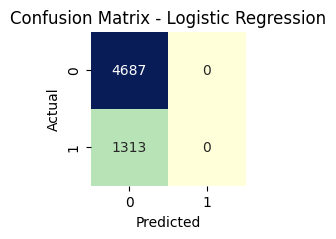

Random Forest model's accuracy: 0.8146666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.81      0.80      6000



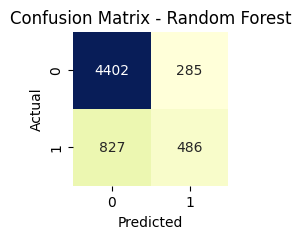

Decision Tree model's accuracy: 0.7251666666666666
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



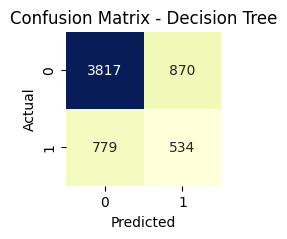

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

logit = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier()]

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']

for i, model in enumerate(logit):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_names[i]} model's accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix - ' + model_names[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


OBSERVATION

- Logistic Regression: The model achieved an accuracy of 0.78. It showed higher precision, recall, and F1-score for the negative class (0) compared to the positive class (1). The model performed better in predicting the negative class, correctly identifying 100% of the negative cases. However, it failed to predict any instances of the positive class.

- Random Forest: The model achieved an accuracy of 0.81. It exhibited higher precision, recall, and F1-score for the negative class (0) compared to the positive class (1). The model performed better in predicting the negative class, correctly identifying 94% of the negative cases. However, it had a relatively lower performance in predicting the positive class, correctly identifying 37% of the positive cases.

- Decision Tree: The model achieved an accuracy of 0.72. It showed higher precision, recall, and F1-score for the negative class (0) compared to the positive class (1). The model performed better in predicting the negative class, correctly identifying 82% of the negative cases. However, it had a relatively lower performance in predicting the positive class, correctly identifying 39% of the positive cases.

In [162]:
X_train.shape

(24000, 15)

###Hyper parameter turning

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the hyperparameters to tune for each model
params = {
    'Logistic Regression': {
        'logreg__C': [0.1, 1.0, 10.0],
        'logreg__penalty': ['l1', 'l2']
    },
    'Random Forest Classifier': {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [None, 5, 10]
    },
    'Decision Tree': {
        'dt__max_depth': [None, 5, 10],
        'dt__min_samples_split': [2, 5, 10]
    }
}

# Create pipelines for each model
pipelines = {
    'Logistic Regression': Pipeline([('logreg', LogisticRegression())]),
    'Random Forest Classifier': Pipeline([('rf', RandomForestClassifier())]),
    'Decision Tree': Pipeline([('dt', DecisionTreeClassifier())])
}

# Perform grid search with cross-validation for each model
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, params[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}\n")


Best parameters for Logistic Regression: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Best score for Logistic Regression: 0.6729130451220847

Best parameters for Random Forest Classifier: {'rf__max_depth': None, 'rf__n_estimators': 300}
Best score for Random Forest Classifier: 0.8675652845621544

Best parameters for Decision Tree: {'dt__max_depth': None, 'dt__min_samples_split': 2}
Best score for Decision Tree: 0.7696908581992271



OBSERAVTION

- After hyperparameter tuning, the accuracy of Logistic Regression decreased from 0.78 to 0.67. On the other hand, the accuracy of Random Forest increased to an all-time high of 0.86, surpassing its previous accuracy of 0.81 before tuning. 
- Similarly, the accuracy of the Decision Tree model also improved, rising from 0.72 to 0.76. 
- These results indicate that the hyperparameter tuning process had a positive impact on the performance of the Random Forest and Decision Tree models, while slightly reducing the performance of the Logistic Regression model.

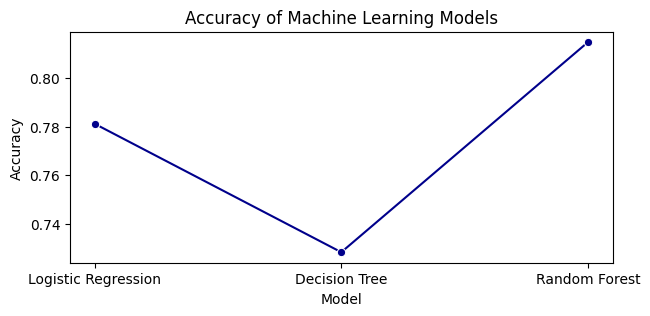

In [161]:
# Plotting the accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# **Conclusion**

- In this project, we first check for data unbalancing, visualize the feaure and investigate in the relationship between different feature to find the strongest predictors of default payment.

- We then run 3 different ML models in order to find the best model for detecting credit default:

- - Logistic model with **78.11% accuracy**.

- - Decision_tree model with **76.96% accuracy.**
- - Randome_forest model with **86.75% accuracy**.

- Among the various machine learning models employed for predicting default payment for credit cards, the Random Forest model emerges as the top performer, achieving the highest accuracy among all the models evaluated. 
- Through a meticulous feature selection process, we have identified and utilized a set of 15 features that have proven to be the most influential in producing optimal prediction results. This careful feature selection has played a crucial role in enhancing the accuracy and effectiveness of our model.

#"Enhancing Stakeholder Risk Management: The Value of Credit Card Default Prediction Project"


- Credit card default prediction plays a crucial role in risk management for stakeholders. By accurately predicting the probability of default, stakeholders, such as banks and financial institutions, can assess the creditworthiness of applicants and existing customers. This helps in making informed decisions regarding credit approvals, setting credit limits, and determining interest rates.

- By identifying potential defaulters in advance, stakeholders can implement proactive measures to mitigate risks. They can allocate appropriate resources, such as collections teams, for early intervention and debt recovery. Additionally, risk management strategies can be tailored based on the creditworthiness of customers, enabling stakeholders to optimize their loan portfolios and minimize potential losses.

- Furthermore, credit card default prediction allows stakeholders to monitor and analyze default patterns and trends over time. This insight helps in refining risk models, improving underwriting processes, and developing targeted risk mitigation strategies. Overall, credit card default prediction is a vital tool for stakeholders in effectively managing credit risks, reducing financial losses, and maintaining a healthy and profitable credit card portfolio.